In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
# Folder paths
X_train = []
Y_train = []
image_size = 200
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)


for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [5]:
X_train,Y_train = shuffle(X_train, Y_train, random_state = 101)
X_train.shape

(3264, 200, 200, 3)

In [6]:
#Train Test split

X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.3, random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)


In [8]:
#CNN 
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (200,200,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation ='relu'))
model.add(Dense(512,activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation= 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 196, 196, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 96, 96, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 94, 94, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 94, 94, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 43, 43, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 41, 41, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,558,852 (36.46 MB)

 Trainable params: 9,558,852 (36.46 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train, epochs = 25,validation_split = 0.1)

Epoch 1/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 31s 240ms/step - accuracy: 0.3021 - loss: 9.5749 - val_accuracy: 0.3406 - val_loss: 1.3523
Epoch 2/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.3188 - loss: 1.3428 - val_accuracy: 0.4410 - val_loss: 1.3037
Epoch 3/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.4729 - loss: 1.1938 - val_accuracy: 0.5240 - val_loss: 1.1696
Epoch 4/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.5017 - loss: 1.0886 - val_accuracy: 0.6419 - val_loss: 0.8674
Epoch 5/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6143 - loss: 0.9223 - val_accuracy: 0.6681 - val_loss: 0.8088
Epoch 6/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.6472 - loss: 0.8585 - val_accuracy: 0.7118 - val_loss: 0.7191
Epoch 7/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7238 - loss: 0.7268 - val_accuracy: 0.5721 - val_loss: 0.8621
Epoch 8/25
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7588 - loss: 0.6108 - val_accuracy: 0.8079 -

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
model.save('braintumor.h5')

<function matplotlib.pyplot.show(close=None, block=None)>

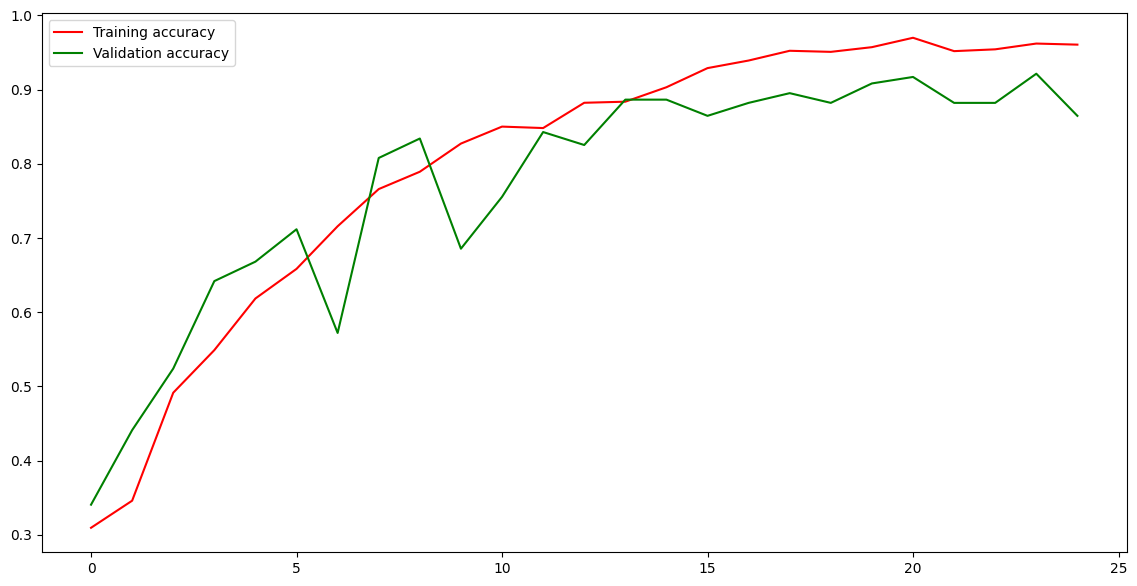

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs,acc,'r',label= 'Training accuracy')
plt.plot(epochs,val_acc,'g',label= 'Validation accuracy')
plt.legend(loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

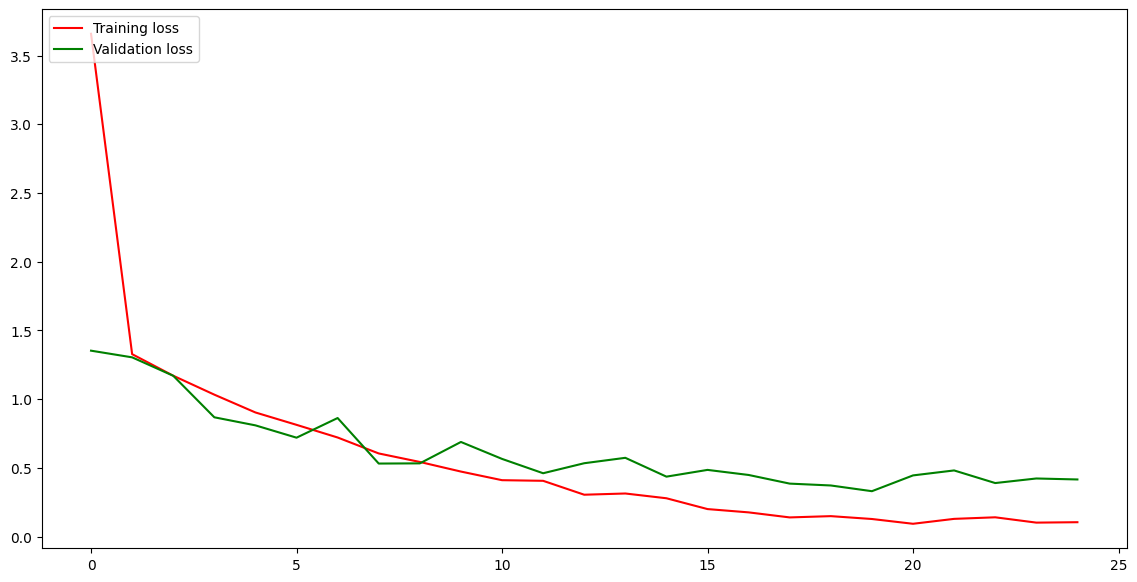

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs,loss,'r',label= 'Training loss')
plt.plot(epochs,val_loss,'g',label= 'Validation loss')
plt.legend(loc = 'upper left')
plt.show

In [24]:
#Prediction

img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(11).jpg')
img = cv2.resize(img,(200,200))
img_array = np.array(img)
img_array.shape 

(200, 200, 3)

In [25]:
img_array = img_array.reshape(1, 200, 200, 3)
img_array.shape

(1, 200, 200, 3)

In [26]:
a = model.predict(img_array) # 0 stands for Glioma, 1 for meningioma, 2 for no tumor and 3 for pituitary tumor
indices = a.argmax()
indices 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


2